In [1]:
#conda install -c conda-forge missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

## LOAD

In [3]:
df = pd.read_csv("../data/200418COVID19MEXICO.csv")
df.head()

/home/vagrant/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-18,2,9,15,1,15,15,37.0,2,2020-04-09,...,2,2,2,2,2,1,99,99,97,1
1,2020-04-18,2,12,9,1,15,9,3.0,1,2020-04-16,...,2,1,2,2,2,2,99,99,97,97
2,2020-04-18,2,9,28,2,16,28,32.0,1,2020-04-06,...,2,2,2,2,1,1,99,99,97,97
3,2020-04-18,2,12,9,2,99,9,13.0,1,2020-04-17,...,2,2,2,2,1,3,99,99,97,97
4,2020-04-18,1,3,15,2,15,15,106.0,1,2020-04-16,...,2,1,2,2,1,3,99,99,97,97


In [4]:
df.tail()

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
49162,2020-04-18,2,12,9,1,99,9,16.0,1,2020-04-10,...,2,2,2,2,1,2,99,99,97,97
49163,2020-04-18,2,12,30,1,20,30,39.0,1,2020-03-24,...,2,1,2,1,1,2,99,México,97,97
49164,2020-04-18,1,12,31,1,31,31,50.0,1,2020-04-04,...,2,2,2,2,2,2,99,99,97,97
49165,2020-04-18,1,12,26,1,26,26,43.0,2,2020-04-13,...,2,1,2,2,2,2,99,99,97,2
49166,2020-04-18,1,12,19,1,19,19,39.0,1,2020-04-14,...,2,1,2,2,2,3,99,99,97,97


In [5]:
df.shape

(49167, 34)

In [6]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO',
       'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49167 entries, 0 to 49166
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA_ACTUALIZACION  49167 non-null  object 
 1   ORIGEN               49167 non-null  int64  
 2   SECTOR               49167 non-null  int64  
 3   ENTIDAD_UM           49167 non-null  int64  
 4   SEXO                 49167 non-null  int64  
 5   ENTIDAD_NAC          49167 non-null  int64  
 6   ENTIDAD_RES          49167 non-null  int64  
 7   MUNICIPIO_RES        49158 non-null  float64
 8   TIPO_PACIENTE        49167 non-null  int64  
 9   FECHA_INGRESO        49167 non-null  object 
 10  FECHA_SINTOMAS       49167 non-null  object 
 11  FECHA_DEF            49167 non-null  object 
 12  INTUBADO             49167 non-null  int64  
 13  NEUMONIA             49167 non-null  int64  
 14  EDAD                 49167 non-null  int64  
 15  NACIONALIDAD         49167 non-null 

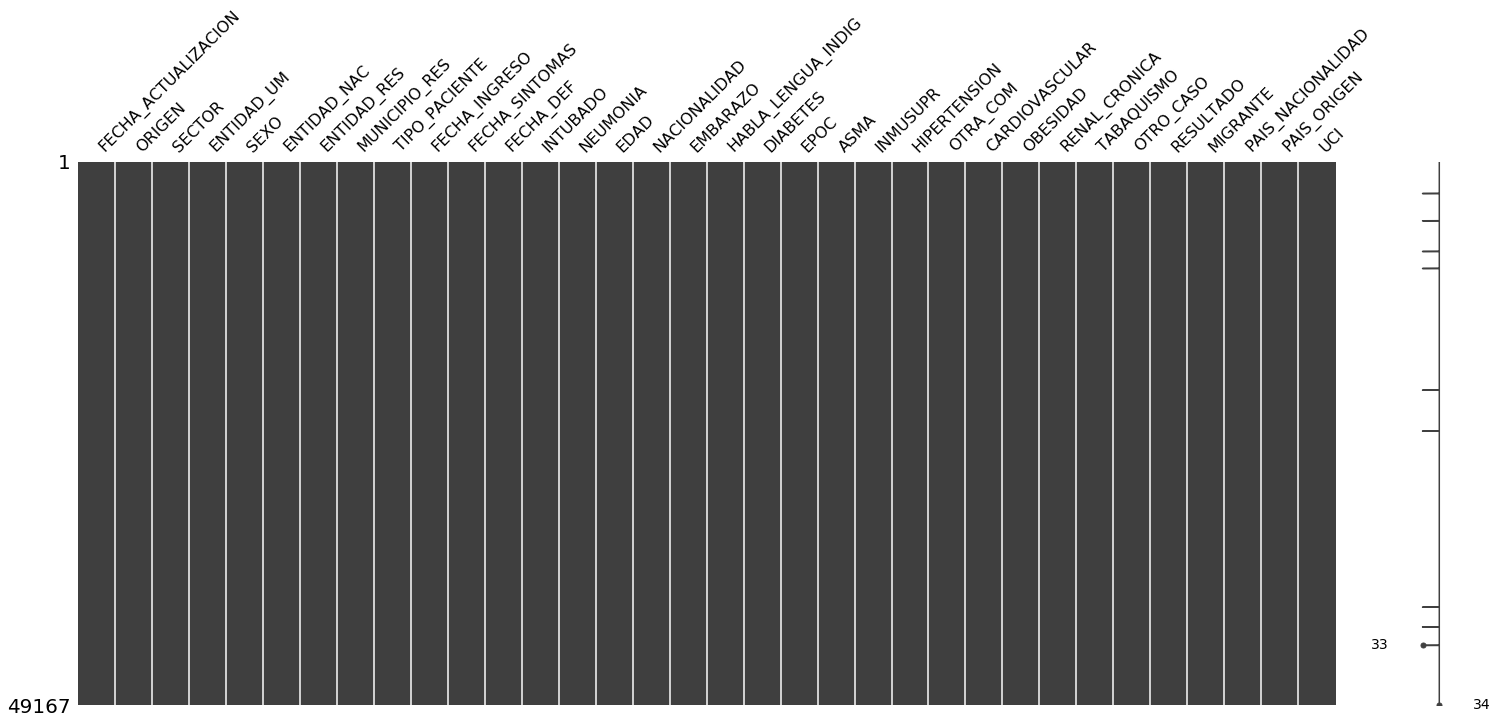

In [8]:
msno.matrix(df)

In [9]:
for column in df:
    print("----------*----------*----------*----------*----------*----------*----------*----------")
    print("Columna: ", column)
    print("Número de valores únicos: ", df[column].nunique())
    print("Valores únicos: ", df[column].unique())
    print("Conteo de valores", df[column].value_counts())

----------*----------*----------*----------*----------*----------*----------*----------
Columna:  FECHA_ACTUALIZACION
Número de valores únicos:  1
Valores únicos:  ['2020-04-18']
Conteo de valores 2020-04-18    49167
Name: FECHA_ACTUALIZACION, dtype: int64
----------*----------*----------*----------*----------*----------*----------*----------
Columna:  ORIGEN
Número de valores únicos:  2
Valores únicos:  [2 1]
Conteo de valores 2    29738
1    19429
Name: ORIGEN, dtype: int64
----------*----------*----------*----------*----------*----------*----------*----------
Columna:  SECTOR
Número de valores únicos:  13
Valores únicos:  [ 9 12  3  4  6  5  8 10 13 11  7  2  1]
Conteo de valores 12    25603
4     17524
9      2514
6      1696
3       781
5       245
8       241
13      199
10      158
11      150
7        40
2        10
1         6
Name: SECTOR, dtype: int64
----------*----------*----------*----------*----------*----------*----------*----------
Columna:  ENTIDAD_UM
Número de valore